<a href="https://colab.research.google.com/github/lucaasnathan/AprendizadoMaquinaSupervisionado/blob/main/AprendizadoMaquinaSupervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome dos integrantes: Lucas Nathan de Oliveira e Mateus dos anjos

Turma (BSI - Quarta)

Especificações técnicas para o trabalho de Aprendizado Supervisionado do 2º bimestre:

O dataset a ser treinado precisa possuir a coluna alvo para classificação. Para este trabalho os datasets do Kaggle podem ser utilizados, lembrando que espera-se os comentários sobre os resultados e a descrição das colunas (dicionário de dados se existir) para entender o problema. O dataset precisa estar limpo, sem campos nulos, e com os tipos devidamente formatados. Dados categóricos e numéricos para treinamento são necessários.

Critérios de avaliação:

1.5 sendo 0.5 para cada algoritmo implementado corretamente (Árvore de decisão, Random Forests e Regressão Logística) com comentários e código e a respectivas comparação final entre os mesmos. 0.5 para a organização do arquivo e contribuição (caso seja dupla). 1.0 para apresentação do trabalho a ser avaliado de forma individual como defesa de código.

Importando Pandas e bibliotecas:



In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [4]:
df = pd.read_csv('/content/drive/MyDrive/ciencia_de_dados/Trabalho 3.0/exams.csv', 
                 sep=',', encoding='iso-8859-1')

In [6]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Buscando valores que possuem em cada coluna:

In [8]:
df['gender'].unique()

array(['male', 'female'], dtype=object)

In [9]:
df['race/ethnicity'].unique()

array(['group A', 'group D', 'group E', 'group B', 'group C'],
      dtype=object)

In [10]:
df['parental level of education'].unique()

array(['high school', 'some high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [11]:
df['test preparation course'].unique()

array(['completed', 'none'], dtype=object)

In [12]:
df['math score'].unique()

array([ 67,  40,  59,  77,  78,  63,  62,  93,  47,  99,  80,  74,  81,
        69,  58,  54,  23,  39,  83,  71,  44,  46,  51,  53,  33,  87,
        65,  79,  68,  57,  98, 100,  60,  64,  52,  36,  56,  88,  42,
        76,  49,  72,  31,  32,  97,  94,  95,  45,  75,  66,  70,  82,
        92,  30,  41,  43,  55,  73,  48,  86,  84,  50,  89,  91,  85,
        61,  35,  90,  96,  13,  38,  28,  26,  37,  29,  34,  25])

In [13]:
df['reading score'].unique()

array([ 67,  59,  60,  78,  73,  77,  88,  56,  42,  83,  87,  74,  61,
        47,  62,  44,  32,  76,  52,  69,  55,  38,  45,  68,  89,  54,
        79,  41,  65,  81,  75,  70,  46,  63,  72,  58,  53,  57,  80,
        51,  66,  82,  93,  64,  91,  43,  71, 100,  50,  33,  34,  90,
        84,  95,  98,  92,  85,  49,  86,  48,  94,  36,  28,  39,  29,
        96,  97,  40,  27,  37,  99,  31,  35])

In [14]:
df['writing score'].unique()

array([ 63,  55,  50,  68,  76,  84,  65,  45,  85,  90,  73,  57,  42,
        44,  31,  88,  54,  32,  56,  60,  89,  51,  77,  39,  71,  74,
        75,  72,  64,  82,  70,  87,  78,  49,  47,  62,  83,  48,  59,
        97,  81,  67,  69,  61,  93, 100,  53,  79,  58,  33,  86,  66,
        46,  80,  91,  92,  95,  99,  96,  28,  52,  24,  40,  43,  94,
        23,  38,  30,  35,  41,  98,  36,  27,  26,  34,  37])

In [15]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

Alterando o nome das colunas para português e excluindo coluna 'LUNCH' que não vai ser utilizada no momento

In [16]:
df.rename(columns={'gender': 'genero'}, inplace=True)
df.rename(columns={'race/ethnicity': 'raca'}, inplace=True)
df.rename(columns={'parental level of education': 'escolaridade_dos_pais'}, inplace=True)
df.rename(columns={'test preparation course': 'preparacao_para_teste'}, inplace=True)
df.rename(columns={'math score': 'pontuacao_matematica'}, inplace=True)
df.rename(columns={'reading score': 'pontuacao_leitura'}, inplace=True)
df.rename(columns={'writing score': 'pontuacao_escrita'}, inplace=True)
df.drop(columns={'lunch'}, inplace=True)

In [17]:
df.head()

,genero,raca,escolaridade_dos_pais,preparacao_para_teste,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita
0,male,group A,high school,completed,67,67,63
1,female,group D,some high school,none,40,59,55
2,male,group E,some college,none,59,60,50
3,male,group B,high school,none,77,78,68
4,male,group E,associate's degree,completed,78,73,68


Buscando existencia de valores ausentes

In [18]:
df.isnull().sum()

genero                   0
raca                     0
escolaridade_dos_pais    0
preparacao_para_teste    0
pontuacao_matematica     0
pontuacao_leitura        0
pontuacao_escrita        0
dtype: int64

Buscando orientação dos tipos de coluna:

In [19]:
df.dtypes

genero                   object
raca                     object
escolaridade_dos_pais    object
preparacao_para_teste    object
pontuacao_matematica      int64
pontuacao_leitura         int64
pontuacao_escrita         int64
dtype: object

informando a quantidade de linhas e colunas:

In [20]:
print('Número de Linhas = ',df.shape[0])
print('Número de Colunas = ',df.shape[1])

Número de Linhas =  1000
Número de Colunas =  7


# Árvores de Decisão


Alterando variaveis categoricas nominais em variaveis ordinais:


In [21]:
df['genero'].replace({'female':0, 'male':1}, inplace=True)
df['preparacao_para_teste'].replace({'none':0, 'completed': 1}, inplace=True)

In [22]:
df.head()

,genero,raca,escolaridade_dos_pais,preparacao_para_teste,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita
0,1,group A,high school,1,67,67,63
1,0,group D,some high school,0,40,59,55
2,1,group E,some college,0,59,60,50
3,1,group B,high school,0,77,78,68
4,1,group E,associate's degree,1,78,73,68


In [23]:
df.dtypes

genero                    int64
raca                     object
escolaridade_dos_pais    object
preparacao_para_teste     int64
pontuacao_matematica      int64
pontuacao_leitura         int64
pontuacao_escrita         int64
dtype: object

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [28]:
encoder = OneHotEncoder()
oneHotEncoder = encoder.fit_transform(df[['raca']])

In [29]:
oneHotEncoder.todense()

matrix([[1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.]])

In [30]:
oneHotEncoder.shape

(1000, 5)

In [31]:
nome_colunas = encoder.get_feature_names(['raca'])
df_encoder = pd.DataFrame(oneHotEncoder.todense(), columns= nome_colunas)
df_encoder

,raca_group A,raca_group B,raca_group C,raca_group D,raca_group E
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
995,0.0,0.0,1.0,0.0,0.0
996,0.0,0.0,0.0,1.0,0.0
997,0.0,0.0,1.0,0.0,0.0
998,0.0,0.0,1.0,0.0,0.0


In [32]:
df = pd.concat([df, df_encoder], axis=1).drop(['raca'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   genero                 1000 non-null   int64  
 1   escolaridade_dos_pais  1000 non-null   object 
 2   preparacao_para_teste  1000 non-null   int64  
 3   pontuacao_matematica   1000 non-null   int64  
 4   pontuacao_leitura      1000 non-null   int64  
 5   pontuacao_escrita      1000 non-null   int64  
 6   raca_group A           1000 non-null   float64
 7   raca_group B           1000 non-null   float64
 8   raca_group C           1000 non-null   float64
 9   raca_group D           1000 non-null   float64
 10  raca_group E           1000 non-null   float64
dtypes: float64(5), int64(5), object(1)
memory usage: 86.1+ KB


In [35]:
encoder = OneHotEncoder()
oneHotEncoder = encoder.fit_transform(df[['escolaridade_dos_pais']])

In [36]:
oneHotEncoder.todense()

matrix([[0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0.],
        ...,
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0.]])

In [37]:
oneHotEncoder.shape

(1000, 6)

In [38]:
nome_colunas = encoder.get_feature_names(['escolaridade_dos_pais'])
df_encoder = pd.DataFrame(oneHotEncoder.todense(), columns= nome_colunas)
df_encoder

,escolaridade_dos_pais_associate's degree,escolaridade_dos_pais_bachelor's degree,escolaridade_dos_pais_high school,escolaridade_dos_pais_master's degree,escolaridade_dos_pais_some college,escolaridade_dos_pais_some high school
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
995,0.0,0.0,1.0,0.0,0.0,0.0
996,1.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,1.0
998,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
df = pd.concat([df, df_encoder], axis=1).drop(['escolaridade_dos_pais'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   genero                                    1000 non-null   int64  
 1   preparacao_para_teste                     1000 non-null   int64  
 2   pontuacao_matematica                      1000 non-null   int64  
 3   pontuacao_leitura                         1000 non-null   int64  
 4   pontuacao_escrita                         1000 non-null   int64  
 5   raca_group A                              1000 non-null   float64
 6   raca_group B                              1000 non-null   float64
 7   raca_group C                              1000 non-null   float64
 8   raca_group D                              1000 non-null   float64
 9   raca_group E                              1000 non-null   float64
 10  escolaridade_dos_pais_associate's deg

In [40]:
df.head()

,genero,preparacao_para_teste,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita,raca_group A,raca_group B,raca_group C,raca_group D,raca_group E,escolaridade_dos_pais_associate's degree,escolaridade_dos_pais_bachelor's degree,escolaridade_dos_pais_high school,escolaridade_dos_pais_master's degree,escolaridade_dos_pais_some college,escolaridade_dos_pais_some high school
0,1,1,67,67,63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,0,40,59,55,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,59,60,50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0,77,78,68,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,1,78,73,68,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [45]:
previsores = df.iloc[:, 0:11].values

In [46]:
previsores

array([[ 1.,  1., 67., ...,  0.,  0.,  0.],
       [ 0.,  0., 40., ...,  1.,  0.,  0.],
       [ 1.,  0., 59., ...,  0.,  1.,  0.],
       ...,
       [ 0.,  0., 32., ...,  0.,  0.,  0.],
       [ 0.,  0., 73., ...,  0.,  0.,  0.],
       [ 1.,  1., 65., ...,  0.,  0.,  0.]])

In [47]:
previsores.shape

(1000, 11)

In [48]:
alvo = df.iloc[:, 11].values

In [49]:
alvo

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [50]:
alvo.shape

(1000,)

In [51]:
df.describe()

,genero,preparacao_para_teste,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita,raca_group A,raca_group B,raca_group C,raca_group D,raca_group E,escolaridade_dos_pais_associate's degree,escolaridade_dos_pais_bachelor's degree,escolaridade_dos_pais_high school,escolaridade_dos_pais_master's degree,escolaridade_dos_pais_some college,escolaridade_dos_pais_some high school
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.517000,0.335000,66.396000,69.002000,67.738000,0.079000,0.205000,0.323000,0.262000,0.131000,0.203000,0.112000,0.202000,0.070000,0.222000,0.191000
std,0.499961,0.472227,15.402871,14.737272,15.600985,0.269874,0.403904,0.467857,0.439943,0.337569,0.402434,0.315524,0.401693,0.255275,0.415799,0.393286
min,0.000000,0.000000,13.000000,27.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,56.000000,60.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,66.500000,70.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,77.000000,79.000000,79.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
df.head()

,genero,preparacao_para_teste,pontuacao_matematica,pontuacao_leitura,pontuacao_escrita,raca_group A,raca_group B,raca_group C,raca_group D,raca_group E,escolaridade_dos_pais_associate's degree,escolaridade_dos_pais_bachelor's degree,escolaridade_dos_pais_high school,escolaridade_dos_pais_master's degree,escolaridade_dos_pais_some college,escolaridade_dos_pais_some high school
0,1,1,67,67,63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,0,40,59,55,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,59,60,50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0,77,78,68,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,1,78,73,68,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [55]:
previsores_esc

array([[ 0.96655883,  1.40892676,  0.03923309, ..., -0.59583014,
        -0.38826278, -0.50468321],
       [-1.03459817, -0.7097601 , -1.714564  , ...,  1.67833069,
        -0.38826278, -0.50468321],
       [ 0.96655883, -0.7097601 , -0.48041049, ..., -0.59583014,
         2.57557523, -0.50468321],
       ...,
       [-1.03459817, -0.7097601 , -2.23420758, ..., -0.59583014,
        -0.38826278, -0.50468321],
       [-1.03459817, -0.7097601 ,  0.42896578, ..., -0.59583014,
        -0.38826278, -0.50468321],
       [ 0.96655883,  1.40892676, -0.0906778 , ..., -0.59583014,
        -0.38826278, -0.50468321]])

In [56]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7,8,9,10
0,0.966559,1.408927,0.039233,-0.135914,-0.303851,3.414415,-0.507801,-0.690728,-0.595830,-0.388263,-0.504683
1,-1.034598,-0.709760,-1.714564,-0.679027,-0.816895,-0.292876,-0.507801,-0.690728,1.678331,-0.388263,-0.504683
2,0.966559,-0.709760,-0.480410,-0.611138,-1.137548,-0.292876,-0.507801,-0.690728,-0.595830,2.575575,-0.504683
3,0.966559,-0.709760,0.688788,0.610866,0.016802,-0.292876,1.969276,-0.690728,-0.595830,-0.388263,-0.504683
4,0.966559,1.408927,0.753743,0.271421,0.016802,-0.292876,-0.507801,-0.690728,-0.595830,2.575575,1.981441
...,...,...,...,...,...,...,...,...,...,...,...
995,0.966559,-0.709760,0.428966,0.067753,-0.175590,-0.292876,-0.507801,1.447748,-0.595830,-0.388263,-0.504683
996,0.966559,1.408927,1.208431,1.493425,1.555936,-0.292876,-0.507801,-0.690728,1.678331,-0.388263,1.981441
997,-1.034598,-0.709760,-2.234208,-2.308366,-1.714724,-0.292876,-0.507801,1.447748,-0.595830,-0.388263,-0.504683
998,-1.034598,-0.709760,0.428966,0.339310,0.914630,-0.292876,-0.507801,1.447748,-0.595830,-0.388263,-0.504683


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.3, random_state = 0)

In [59]:
x_treino.shape

(700, 11)

In [60]:
x_teste.shape

(300, 11)

In [61]:
y_treino.shape

(700,)

In [62]:
y_teste.shape

(300,)

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [64]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
_arvore = arvore.fit(x_treino, y_treino)

[Text(0.625, 0.875, 'X[10] <= 0.738\nentropy = 0.446\nsamples = 700\nvalue = [635, 65]'),
 Text(0.5, 0.625, 'X[4] <= 0.883\nentropy = 0.523\nsamples = 552\nvalue = [487, 65]'),
 Text(0.25, 0.375, 'X[3] <= -0.917\nentropy = 0.428\nsamples = 434\nvalue = [396, 38]'),
 Text(0.125, 0.125, 'entropy = 0.225\nsamples = 110\nvalue = [106, 4]'),
 Text(0.375, 0.125, 'entropy = 0.484\nsamples = 324\nvalue = [290, 34]'),
 Text(0.75, 0.375, 'X[0] <= -0.034\nentropy = 0.776\nsamples = 118\nvalue = [91, 27]'),
 Text(0.625, 0.125, 'entropy = 0.626\nsamples = 83\nvalue = [70, 13]'),
 Text(0.875, 0.125, 'entropy = 0.971\nsamples = 35\nvalue = [21, 14]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 148\nvalue = [148, 0]')]

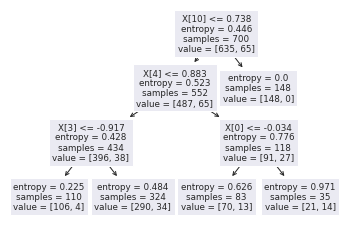

In [65]:
tree.plot_tree(_arvore)

In [66]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [67]:
y_teste

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1.

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [69]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia: 84.33%


In [70]:
confusion_matrix(y_teste, previsoes_arvore)

array([[253,   0],
       [ 47,   0]])

In [ ]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.92       253
         1.0       0.00      0.00      0.00        47

    accuracy                           0.84       300
   macro avg       0.42      0.50      0.46       300
weighted avg       0.71      0.84      0.77       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [72]:
accuracy_score(y_treino, previsoes_treino)

0.9071428571428571

In [73]:
confusion_matrix(y_treino, previsoes_treino)

array([[635,   0],
       [ 65,   0]])


#RANDOM FOREST

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
random = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state = 0, max_depth=4)
random.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=500,
                       random_state=0)

In [76]:
previsoes_random = random.predict(x_teste)
previsoes_random

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [77]:
y_teste

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1.

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [79]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_random) * 100.0))

Acurácia: 84.33%


In [80]:
confusion_matrix(y_teste, previsoes_random)

array([[253,   0],
       [ 47,   0]])

In [81]:
print(classification_report(y_teste, previsoes_random))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.92       253
         1.0       0.00      0.00      0.00        47

    accuracy                           0.84       300
   macro avg       0.42      0.50      0.46       300
weighted avg       0.71      0.84      0.77       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
previsoes_treino = random.predict(x_treino)
previsoes_treino

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [83]:
accuracy_score(y_treino, previsoes_treino)

0.9071428571428571

In [84]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))

Acurácia: 90.71%


In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[635,   0],
       [ 65,   0]])

#Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistica = LogisticRegression(random_state=1, max_iter=500, penalty="l2",
                               tol=0.0001, C=1,solver="lbfgs")
logistica.fit(x_treino, y_treino)

LogisticRegression(C=1, max_iter=500, random_state=1)

In [ ]:
logistica.intercept_

array([-2.9029979])

In [ ]:
logistica.coef_

array([[ 0.37447095, -0.36514117, -0.19663124, -0.46428913,  1.37624826,
         0.09187997,  0.1107542 ,  0.00367806, -0.13269256, -0.03813647,
        -1.47199132]])

In [ ]:
previsoes_logistica = logistica.predict(x_teste)
previsoes_logistica

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_logistica) * 100.0))

Acurácia: 84.00%


In [ ]:
confusion_matrix(y_teste, previsoes_logistica)

array([[252,   1],
       [ 47,   0]])

In [ ]:
print(classification_report(y_teste, previsoes_logistica))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       253
         1.0       0.00      0.00      0.00        47

    accuracy                           0.84       300
   macro avg       0.42      0.50      0.46       300
weighted avg       0.71      0.84      0.77       300



In [ ]:
previsoes_treino = logistica.predict(x_treino)
previsoes_treino

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.9071428571428571

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))

Acurácia: 90.71%


In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[635,   0],
       [ 65,   0]])

**COMPARAÇÃO FINAL EM TREINO**

Árvore de Decisão: 84.33%

Random Forest: 90.71%

Regressão Logística: 90.71%